# Tech-Challenge - Machine Learning

## Base de Dados

In [611]:
# Importando o Pandas
import pandas as pd

In [612]:
# Carregando o DataFrame com os dados da base
df_ibovespa = pd.read_csv('Assets/Base/ibovespa.csv', sep=',')

In [613]:
# Verificando o DataFrame
df_ibovespa.head(10)

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,15.08.2023,116.552,116.809,117.697,116.238,"11,79M","-0,22%"
1,14.08.2023,116.810,118.067,118.082,116.530,"11,20M","-1,06%"
2,11.08.2023,118.065,118.350,119.054,117.415,"11,87M","-0,24%"
3,10.08.2023,118.350,118.412,119.438,118.113,"12,69M","-0,05%"
4,09.08.2023,118.409,119.090,119.090,117.901,"11,25M","-0,57%"
5,08.08.2023,119.090,119.378,119.553,117.492,"10,25M","-0,24%"
6,07.08.2023,119.380,119.509,120.104,118.894,"8,73M","-0,11%"
7,04.08.2023,119.508,120.586,121.442,119.215,"15,07M","-0,89%"
8,03.08.2023,120.586,120.859,122.619,120.365,"13,03M","-0,23%"
9,02.08.2023,120.859,121.249,121.252,119.798,"10,57M","-0,32%"


In [614]:
# Verificando valores nulos no DataFrame
df_ibovespa.isnull().sum()

Data        0
Último      0
Abertura    0
Máxima      0
Mínima      0
Vol.        1
Var%        0
dtype: int64

In [615]:
# Encontrando o dado nulo na linha correspondente
df_ibovespa[df_ibovespa['Vol.'].isna()]

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
1865,10.02.2016,40.377,40.592,40.592,39.96,NaN,"-0,53%"


In [616]:
# Removendo a linha com valor nulo
# Decidimos remover a linha do DataFrame que apresentava valor nulo para que não haja interferência na construção do nosso modelo de previsão
df_ibovespa = df_ibovespa.drop(df_ibovespa[df_ibovespa['Vol.'].isna()].index)

In [617]:
# Removendo coluna Var%
del df_ibovespa['Var%']

In [618]:
# Verificando o shape do DataFrame
df_ibovespa.shape

(4911, 6)

In [619]:
# Verificando informações do Dataframe
df_ibovespa.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4911 entries, 0 to 4911
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Data      4911 non-null   object 
 1   Último    4911 non-null   float64
 2   Abertura  4911 non-null   float64
 3   Máxima    4911 non-null   float64
 4   Mínima    4911 non-null   float64
 5   Vol.      4911 non-null   object 
dtypes: float64(4), object(2)
memory usage: 268.6+ KB


In [620]:
# Convertendo coluna Data de object para datetime
df_ibovespa['Data'] = pd.to_datetime(df_ibovespa['Data'],format='%d.%m.%Y')
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2023-08-15,116.552,116.809,117.697,116.238,"11,79M"
1,2023-08-14,116.810,118.067,118.082,116.530,"11,20M"
2,2023-08-11,118.065,118.350,119.054,117.415,"11,87M"
3,2023-08-10,118.350,118.412,119.438,118.113,"12,69M"
4,2023-08-09,118.409,119.090,119.090,117.901,"11,25M"


In [621]:
# Transformando as colunas que estão como float para int
df_ibovespa['Último'] = df_ibovespa['Último'] * 1000
df_ibovespa['Último'] = df_ibovespa['Último'].astype(int)
df_ibovespa['Abertura'] = df_ibovespa['Abertura'] * 1000
df_ibovespa['Abertura'] = df_ibovespa['Abertura'].astype(int)
df_ibovespa['Máxima'] = df_ibovespa['Máxima'] * 1000
df_ibovespa['Máxima'] = df_ibovespa['Máxima'].astype(int)
df_ibovespa['Mínima'] = df_ibovespa['Mínima'] * 1000
df_ibovespa['Mínima'] = df_ibovespa['Mínima'].astype(int)
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2023-08-15,116552,116809,117697,116238,"11,79M"
1,2023-08-14,116810,118067,118082,116530,"11,20M"
2,2023-08-11,118065,118350,119054,117415,"11,87M"
3,2023-08-10,118350,118412,119438,118113,"12,69M"
4,2023-08-09,118409,119090,119090,117901,"11,25M"


In [622]:
# Transformando a coluna Vol. em numérica
df_ibovespa["Vol."] = df_ibovespa["Vol."].replace({",":".","K":"*1e3", "M":"*1e6"}, regex=True).map(pd.eval).astype(int)
df_ibovespa.head()

,Data,Último,Abertura,Máxima,Mínima,Vol.
0,2023-08-15,116552,116809,117697,116238,11790000
1,2023-08-14,116810,118067,118082,116530,11200000
2,2023-08-11,118065,118350,119054,117415,11870000
3,2023-08-10,118350,118412,119438,118113,12690000
4,2023-08-09,118409,119090,119090,117901,11250000


In [623]:
# Indexando o DataFrame pela data
df_ibovespa_indexData = df_ibovespa.set_index(['Data'])

In [624]:
# Ajustando o DataFrame para os dados ficarem em ordem ascendente quanto a data
df_ibovespa_indexData = df_ibovespa_indexData.sort_index()

In [625]:
# Criando a coluna "Amanhã" que tem o valor do fechamento do mercado do próximo dia em relação ao fechamento da linha atual
df_ibovespa_indexData["Amanhã"] = df_ibovespa_indexData["Último"].shift(-1)

In [626]:
df_ibovespa_indexData = df_ibovespa_indexData.dropna()

In [627]:
# Transformando a coluna "Amanhã" em inteiro
df_ibovespa_indexData["Amanhã"] = df_ibovespa_indexData["Amanhã"].astype(int)

In [628]:
# Criando a coluna "Target" que contem a informação se o mercado subiu ou caiu, 0 e 1 respectivamente
df_ibovespa_indexData["Target"] = (df_ibovespa_indexData["Amanhã"] > df_ibovespa_indexData["Último"]).astype(int)

In [629]:
df_ibovespa_indexData.head()

,Último,Abertura,Máxima,Mínima,Vol.,Amanhã,Target
Data,,,,,,,
2003-10-15,17942,18176,18313,17819,616250000,17955,1
2003-10-16,17955,17944,18075,17834,280560000,17791,0
2003-10-17,17791,17923,17946,17679,205450000,18370,1
2003-10-20,18370,17791,18399,17770,361630000,18449,1
2003-10-21,18449,18370,18660,18370,378080000,18235,0


In [630]:
# Salvando o DataFrame
#df_ibovespa_indexData.to_csv('Assets/DataFrames/ibov_modelo.csv', index=True)

## Visualização

In [631]:
# Importando a biblioteca Matplotlib
import matplotlib.pyplot as plt

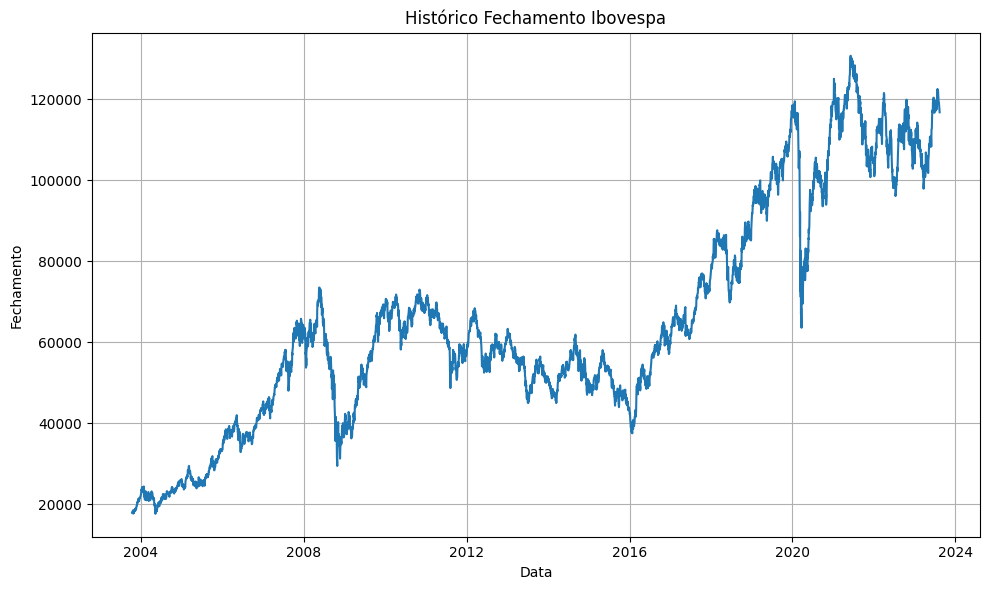

In [632]:
# Criando o gráfico do fechamento histórico do Ibovespa
plt.figure(figsize=(10,6))
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Histórico Fechamento Ibovespa')
plt.plot(df_ibovespa_indexData['Último'])
plt.grid()
plt.tight_layout()
#plt.savefig('Assets/Graficos/historico.jpg')
plt.show()

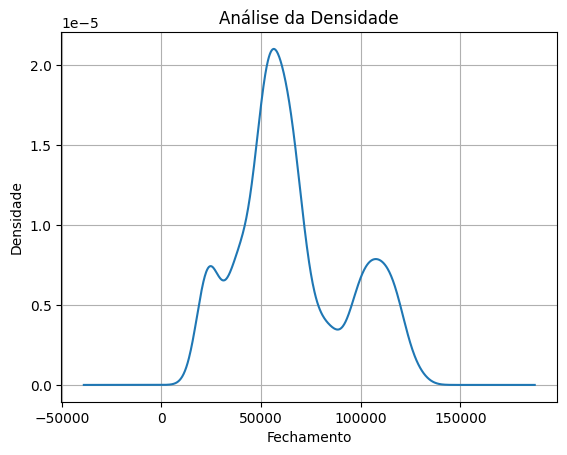

In [633]:
# Distribuição do dataset
df_fechamento = df_ibovespa_indexData['Último']
df_fechamento.plot(kind='kde')
plt.title('Análise da Densidade')
plt.xlabel('Fechamento')
plt.ylabel('Densidade')
plt.grid()
#plt.savefig('Assets/Graficos/densidade.jpg')
plt.show()

In [634]:
# importando o numpy
import numpy as np

In [635]:
# Transformação logarítmica da série temporal
df_ibovespa_indexData_log = np.log(df_ibovespa_indexData['Último'])

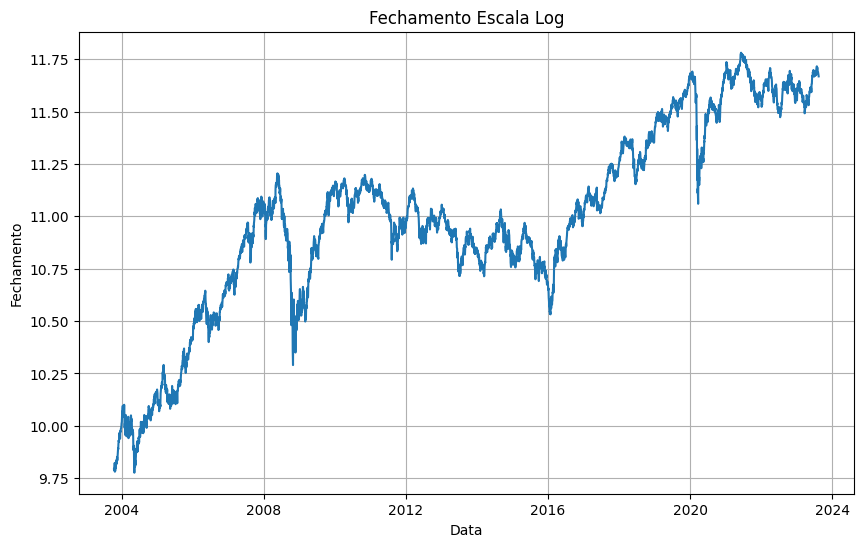

In [636]:
# Gráfico da série temporal logaritmica
plt.figure(figsize=(10,6))
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Fechamento Escala Log')
plt.plot(df_ibovespa_indexData_log)
plt.grid()
#plt.savefig('Assets/Graficos/log.jpg')
plt.show()

In [637]:
# Calculando a média móvel
rolmean = df_ibovespa_indexData['Último'].rolling(12).mean()
rolmean_log = df_ibovespa_indexData_log.rolling(12).mean()

In [638]:
# Calculando o desvio padrão
rolstd = df_ibovespa_indexData['Último'].rolling(12).std()
rolstd_log = df_ibovespa_indexData_log.rolling(12).std()

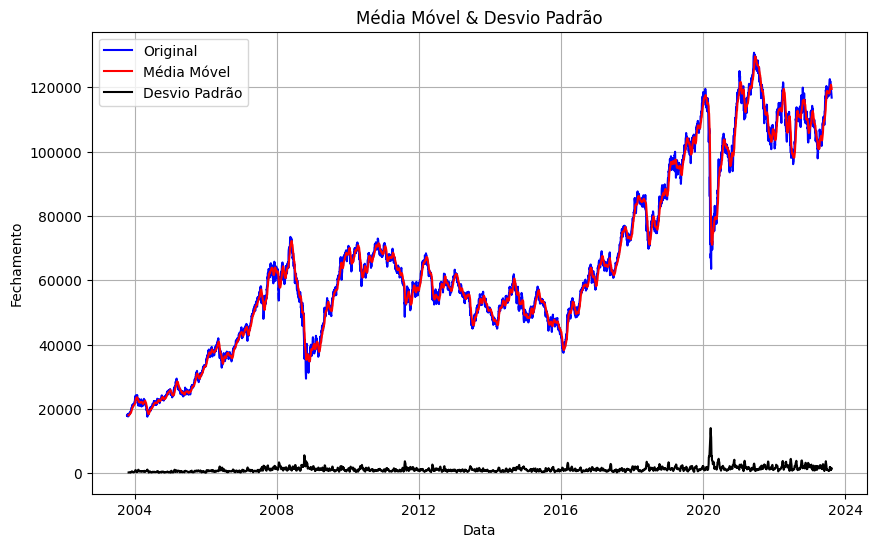

In [639]:
# Média Móvel & Desvio Padrão

plt.figure(figsize=(10,6))
plt.plot(df_ibovespa_indexData['Último'], color='blue', label='Original')
plt.plot(rolmean, color='red', label='Média Móvel')
plt.plot(rolstd, color='black', label='Desvio Padrão')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Média Móvel & Desvio Padrão')
plt.grid()
#plt.savefig('Assets/Graficos/mm_std.jpg')
plt.show()

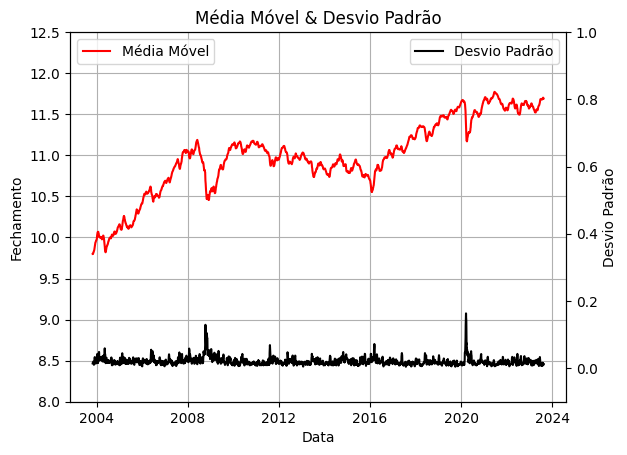

<Figure size 1000x600 with 0 Axes>

In [640]:
# Média Móvel & Desvio Padrão

fig, ax1 = plt.subplots()
plt.figure(figsize=(10,6))
ax1.plot(rolmean_log, color='red', label='Média Móvel')
ax2 = ax1.twinx()
ax2.plot(rolstd_log, color='black', label='Desvio Padrão')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_xlabel('Data')
ax1.set_ylabel('Fechamento')
ax1.set_title('Média Móvel & Desvio Padrão')
ax1.set_ylim(8,12.5)
ax2.set_ylabel('Desvio Padrão')
ax2.set_ylim(-0.1, 1)
ax1.grid()
#fig.savefig('Assets/Graficos/mm_std_log.jpg')
plt.show()

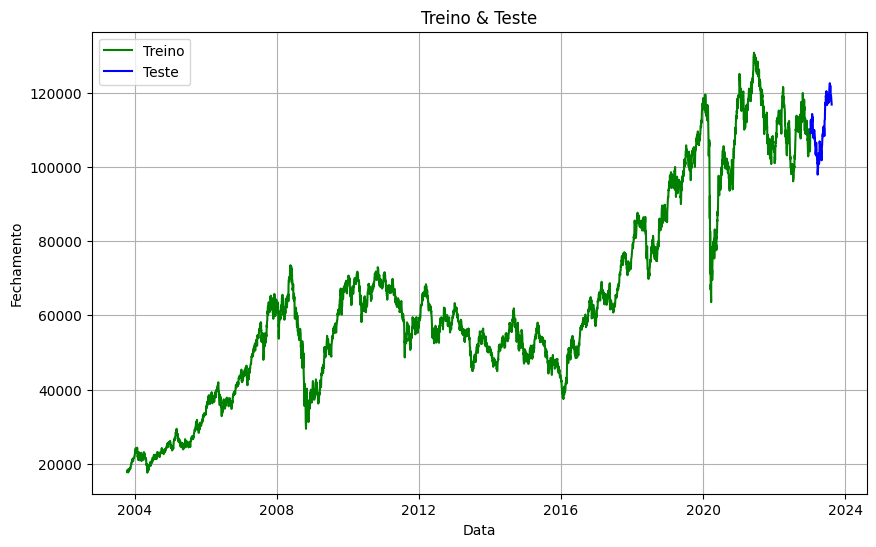

In [641]:
# Por se tratar de dados sensíveis e de maior volatilidade, decidimos dividir treinamento e teste em aproximadamente 90% e 10% dos dados, respectivamente.
# Selecionando um período de aproximadamente 7 meses de dados para o teste.

treino = df_ibovespa_indexData.iloc[:-150]
teste = df_ibovespa_indexData.iloc[-150:]

plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Data')
plt.ylabel('Fechamento')
plt.title('Treino & Teste')
plt.plot(treino["Último"], 'green', label='Treino')
plt.plot(teste["Último"], 'blue', label='Teste')
plt.legend()
#plt.savefig('Assets/Graficos/treino_teste.jpg')
plt.show()

## Modelo

In [642]:
# Criando nosso modelo utilizando o método Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

modelo = RandomForestClassifier(n_estimators=40, min_samples_split=250, random_state=1)

preditores = ["Último","Vol.","Abertura","Máxima","Mínima","Amanhã"]
modelo.fit(treino[preditores], treino["Target"])

RandomForestClassifier(min_samples_split=250, n_estimators=40, random_state=1)

## Previsão

In [643]:
# Fazendo a previsão com os dados ajustados
previsoes = modelo.predict(teste[preditores])

In [644]:
previsoes

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [645]:
# Transformando as previsões em séries
previsoes = pd.Series(previsoes, index=teste.index)

In [646]:
previsoes

Data
2023-01-09    1
2023-01-10    1
2023-01-11    0
2023-01-12    0
2023-01-13    0
             ..
2023-08-08    0
2023-08-09    0
2023-08-10    0
2023-08-11    0
2023-08-14    0
Length: 150, dtype: int32

In [647]:
# Criando as previsões
from sklearn.metrics import precision_score

In [648]:
# Testando a precisão do nosso modelo
precision_score(teste["Target"],previsoes)

0.7078651685393258

In [649]:
# Concatenando dados de previsão e target
combinado = pd.concat([teste["Target"], previsoes], axis=1)

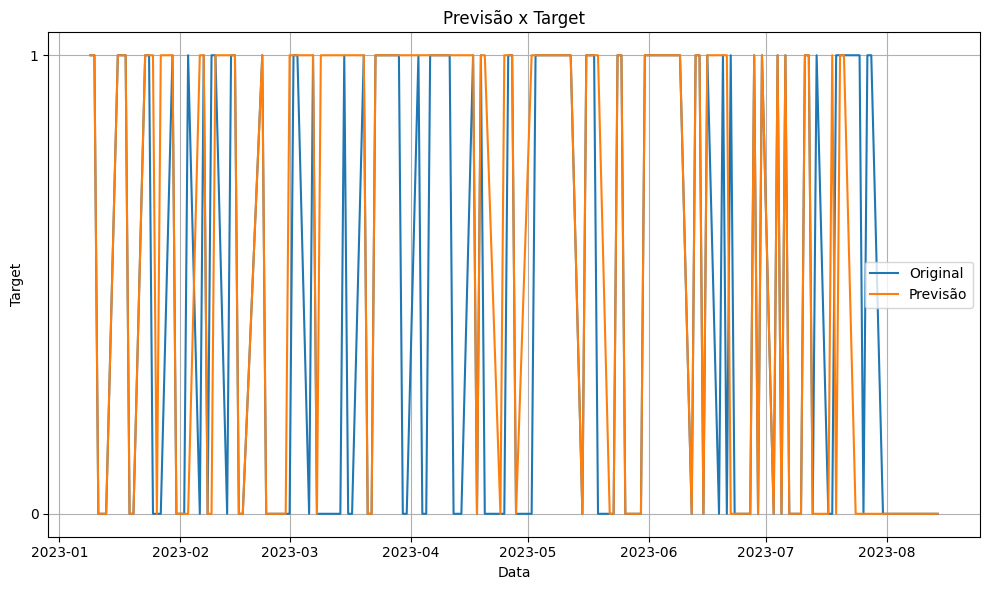

In [650]:
# Criando o gráfico de avaliação da nossa previsão
plt.figure(figsize=(10,6))
plt.xlabel('Data')
plt.ylabel('Target')
plt.title('Previsão x Target')
line1, = plt.plot(combinado["Target"])
line2, = plt.plot(combinado[0])
plt.yticks(range(0,2))
line1.set_label('Original')
line2.set_label('Previsão')
plt.legend()
plt.grid()
plt.tight_layout()
#plt.savefig('Assets/Graficos/previsao_target.jpg')
plt.show()